<center><font size="16">Human Resource Analysis</font></center>

Companies want to improve and maintain a healthy relationship and environment for their employees. This can be achieved by recognizing and understanding the important factors that are associated with employee turnover and taking care of them might add into the productivity and growth of the employees. These insights can help managers for grabing the opportunity to take corrective steps to build and preserve their successful business. 
<br><br>
In this notebook, we will work on the project that is based on understanding what factors contributed most to employee turnover and to create a model that can predict if a certain employee will leave the company or not.<br><br>

### Column Description

- satisfacion_level: Showing satisfaction of a particular employee
- last_evaluation: Showing last evaluation of a particular employee
- number_project: Showing number of projects handled a particular employee
- average_montly_hours: Showing the monthly hours that were spent the particular emloyee
- time_spend_company: Shows the number of years spent by the particular employee in the company.
- Work_accident: Showing an employee has whether been part of the company or not.
- left: Tells either and employee has left the company or not. Shows two values 0= not left, 1= left
- promotion_last_5years: Shows that the whether the employee has got any promotion in the last 5 years or not.
- dept: Shows the departments
- salary: Shows the salary type of the employee

# Wrangling & EDA

In [1]:
#Loading the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
#Loading data
data=pd.read_csv('HR_comma_sep.csv')
df=data.copy()

In [3]:
#Checking shape
df.shape

(14999, 10)

In [4]:
#Display the top 5 rows.
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
#Check the data types of columns
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
dept                      object
salary                    object
dtype: object

In [6]:
#Check the basic statistics
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
#Check if any null values are present
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64

# Exploration

**Before moving ahead, we shall check the details of different variables in the data first**

No. of employees that left the company: 3571


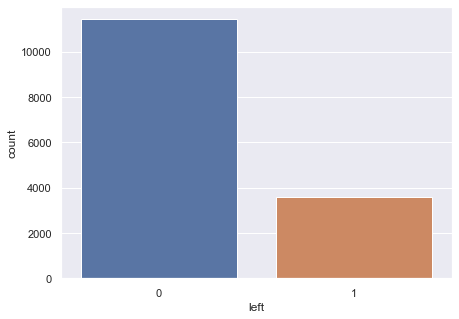

In [8]:
#Count of how many employees left the company
print('No. of employees that left the company:', df['left'].sum())
plt.figure(figsize=(7,5))
sns.countplot(x='left', data=df);

**Note:** The number of employees who did not leave the company is **significantly greater (approximately 3 times)** than the number of employees who left the company.

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64


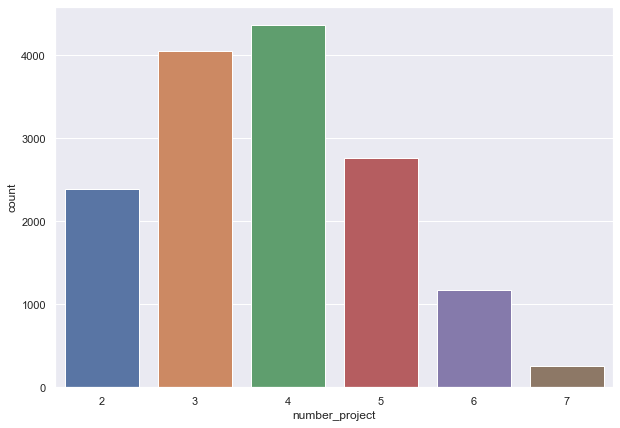

In [9]:
#Plotting the number of projects being handled
print(df['number_project'].value_counts())
plt.figure(figsize=(10,7))
sns.countplot(x='number_project', data=df);

**Note:** The number of projects being handled by employees in **Descending order** is as follows:
1. > 4 projects (highest)
2. > 3 projects
3. > 5 projects
4. > 2 projects
5. > 6 projects
6. > 7 projects (lowest)

**Now we want to see how number of projects contribute to employee turn-over.<br> For this purpose, we can do a groupby. The final results will show the of employees leaving the company against each number of projects.**

In [10]:
grp1=df.groupby('number_project')['left'].sum().reset_index()
grp1

,number_project,left
0,2,1567
1,3,72
2,4,409
3,5,612
4,6,655
5,7,256


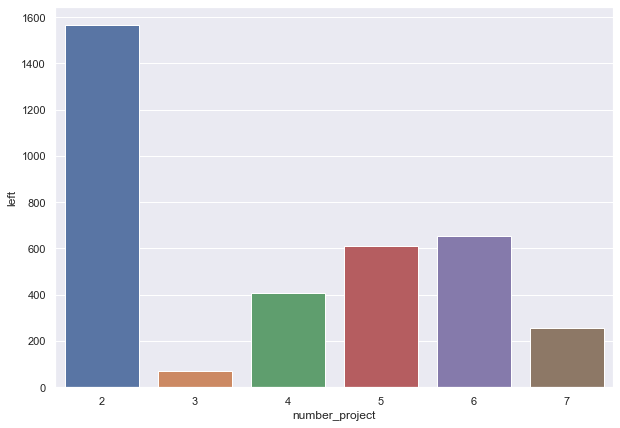

In [11]:
#Making a plot of our findings(only turn-over employees)
plt.figure(figsize=(10,7))
sns.barplot(x='number_project', y='left', data=grp1);

**Note:** According to the graph, the number of people leaving the company against each number of projects in the **Descending order** is as follows:
1. > 2 projects (possibly because they felt their skills were being under-utilized)
2. > 6 projects (due to workload)
3. > 5 projects (due to workload)
4. > 4 projects (due to workload)
5. > 7 projects (due to workload but lower than people handling 2, 6, 5 and 4 projects)
6. > 3 projects (shows **least** number of people who left the company)

## **Time spent at the company**

**Lets find out how time spent at company can lead to employee turn over. We will generate the following plots.**<br>
- Count of Number of years spent by employees.
- After how many years are mostly employees leaving the company? 

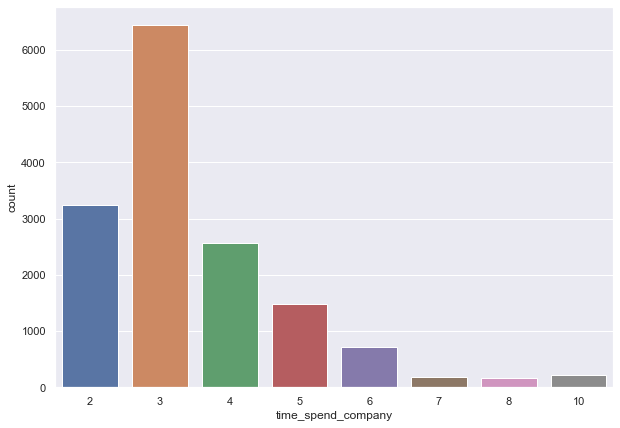

In [12]:
#Plot for the count of years here
plt.figure(figsize=(10,7))
sns.countplot(x='time_spend_company', data=df);

**Note:** The maximum time spent by the employees in the company is **3 years**.

In [13]:
#Checking the percentage of employees leaving.
grp2=df.groupby('time_spend_company')['left'].value_counts(normalize=True).mul(100).reset_index(name='Percentage')
grptime=grp2[grp2['left'] == 1]
grptime

,time_spend_company,left,Percentage
1,2,1,1.633785
3,3,1,24.615862
5,4,1,34.806414
6,5,1,56.551256
9,6,1,29.108635


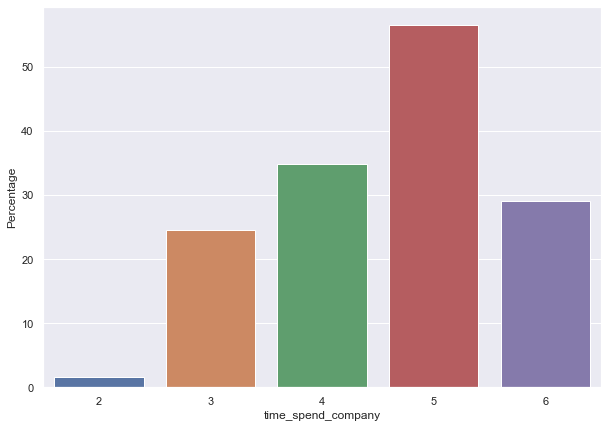

In [14]:
#Bar plot showing years after which employees are likely to leave
plt.figure(figsize=(10,7))
sns.barplot(x='time_spend_company', y='Percentage', data=grptime);

**Note:** Employees are most likely to leave after spending **3 - 6 years** at the company. Plot shows that most number of employees left after 5 years.

## **Employees engaged in any work accident**

**Now lets check how many employees were engaged in work accident and how many of them actually left?**

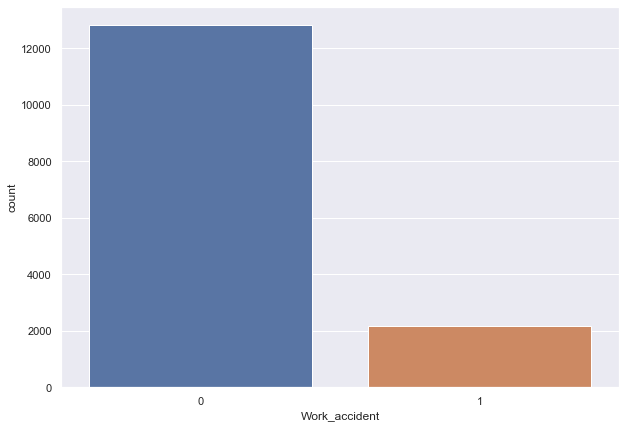

In [15]:
#Number of employees involved in work accident
plt.figure(figsize=(10,7))
sns.countplot(x='Work_accident', data=df);

**Note:** The number of employees involved in Work accidents is **lesser** than the number of employees not involved in Work accidents.

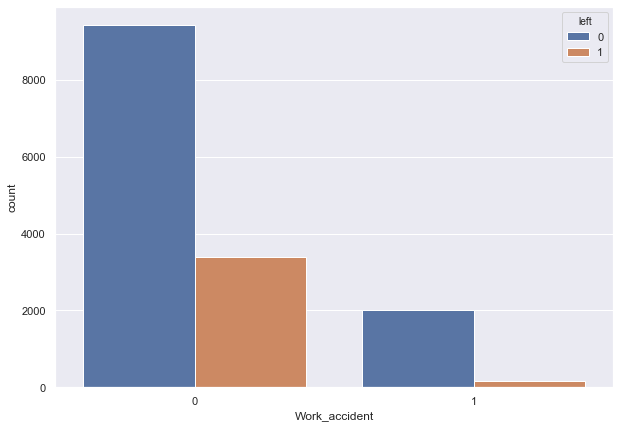

In [16]:
#Number of employees involved in work accident and left or not left
plt.figure(figsize=(10,7))
sns.countplot(x='Work_accident', data=df, hue='left');

## **Promotions in last 5 years**

**Lets find out how many employees got a promotion in the last 5 years and how many of them left?**

   promotion_last_5years  left
0                      0  3552
1                      1    19


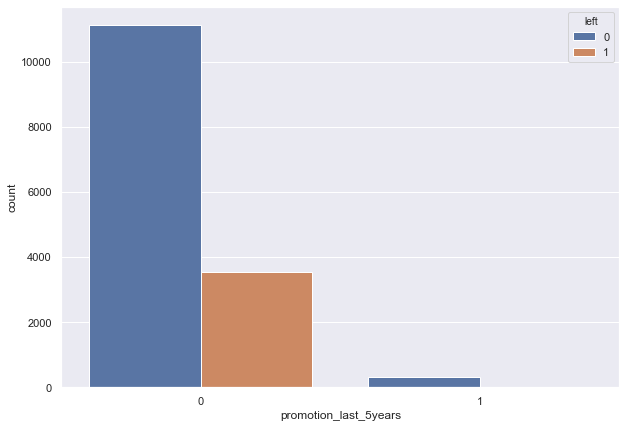

In [17]:
grp3=df.groupby(['promotion_last_5years'])['left'].sum().reset_index()
print(grp3)
plt.figure(figsize=(10,7))
sns.countplot(x='promotion_last_5years', data=df, hue='left');

**Note:** The number of employees who did not receive promotion in the last 5 years and left the company is **very high** as compared to the employees who received promotion in the last 5 years.

## **Salary trends**

**Lets check the salary trends in the data. For this we shall use graphical representation**

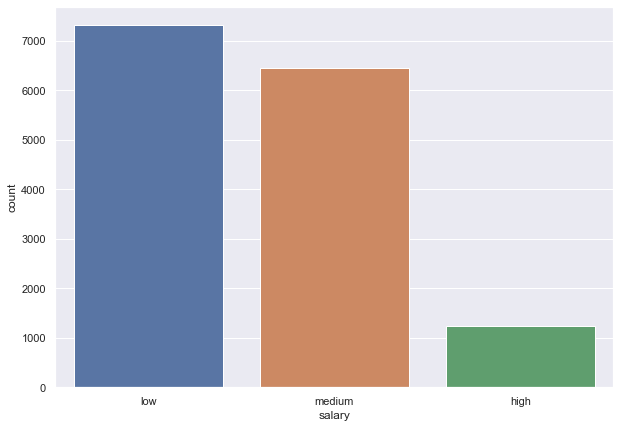

In [18]:
plt.figure(figsize=(10,7))
sns.countplot(x='salary', data=df);

**Note:** The salary trends for employees are as follows:
1. > low (most number of employees are earning low salary)
2. > medium
3. > high (least number of employees are earning high salary)

In [19]:
#Check the percentage of employees who left according to their salaries
grp4=df.groupby('salary')['left'].value_counts(normalize=True).mul(100).reset_index(name='Percentage')
grpslry=grp4[grp4['left'] == 1]
grpslry

,salary,left,Percentage
1,high,1,6.628941
3,low,1,29.688354
5,medium,1,20.431275


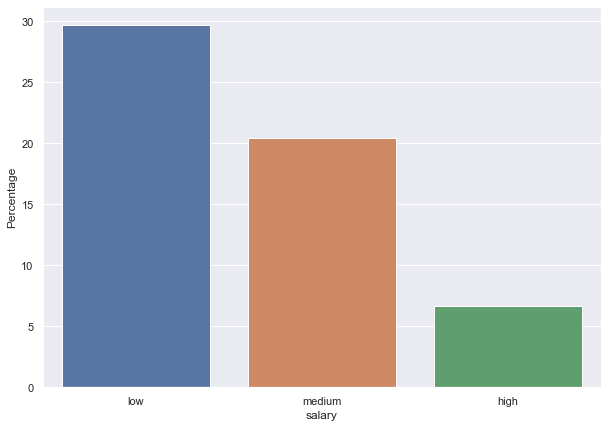

In [20]:
#Make a barplot of results
plt.figure(figsize=(10,7))
sns.barplot(x='salary', y='Percentage', data=grpslry, order=['low', 'medium', 'high']);

**Note:** The employees leaving and salary exhibit the following relation:
1. > low salary: **Most** employees leaving
2. > medium salary: employees leaving is lesser than low salary employees and more as compared to high salary employees
3. > high salary: **Least** employees leaving

## **Employees per Department**

**Check the number of employees per department and determine which department has highest number of employees leaving the company.**

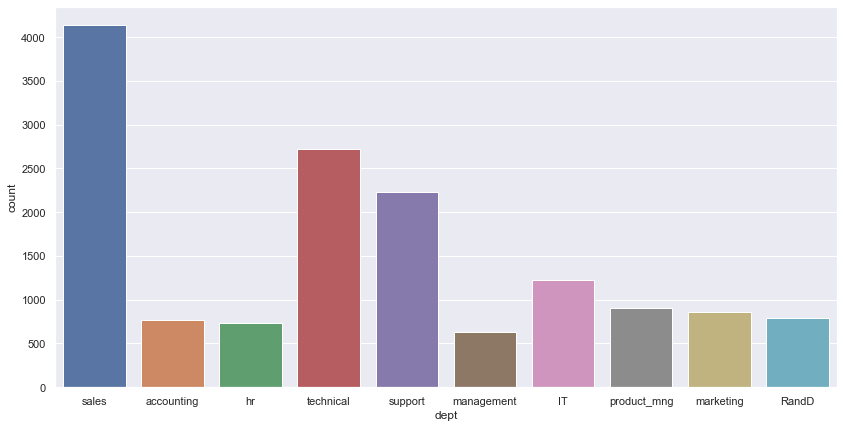

In [21]:
#Checking employee count in each department
plt.figure(figsize=(14,7))
sns.countplot(x='dept', data=df);

**Note:** The **maximum** number of employees are from the **sales** department.

In [22]:
#Lets find the percentage of employees leaving according to department
grp5=df.groupby(['dept'])['left'].value_counts(normalize=True).mul(100).reset_index(name='Percentage')
grpdept=grp5[grp5['left'] == 1]
grpdept

,dept,left,Percentage
1,IT,1,22.249389
3,RandD,1,15.374841
5,accounting,1,26.597132
7,hr,1,29.093369
9,management,1,14.444444
11,marketing,1,23.659674
13,product_mng,1,21.951220
15,sales,1,24.492754
17,support,1,24.899058
19,technical,1,25.625000


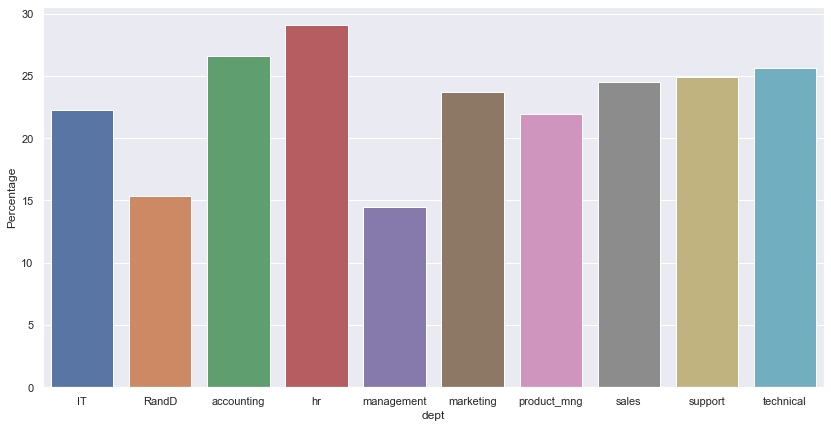

In [23]:
#Make a barplot of the results
plt.figure(figsize=(14,7))
sns.barplot(x='dept', y='Percentage', data=grpdept);

**Note:** The **highest** percentage of employees turn-over is from the **hr, accounting and technical** department ( >25%).

## **Satisfaction Level**

**Checking the satisfaction level of employees who left the company and those who didn't leave, using a kde plot**

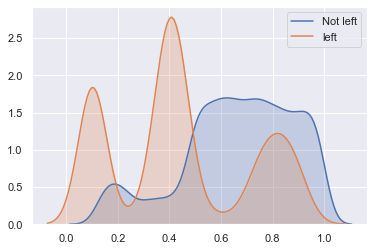

In [24]:
sns.kdeplot(df[df['left'] == 0]['satisfaction_level'], shade=True, label="Not left");
sns.kdeplot(df[df['left'] == 1]['satisfaction_level'], shade=True, label="left");

**Note:** **More** number of employees left the company having satisfaction level < 0.5 as compared to employees having satisfaction level > 0.5

# Feature Engineering

For feature engineering we will add two new features. Looking at the the satisfcation we can conclude that people who are leaving have a low satisfaction level, most likely below 0.5 are leaving and people having a high satisfaction level, most likely above 0.5 are likely to stay. 

**Now we can create a new feature 'satisfaction_level_type' through following conditions:**<br>
- **satisfaction_level >= 0.5 then satisfaction_level_type = 'High'**
- **satisfaction_level < 0.5 then satisfaction_level_type = 'Low'**

In [25]:
df['satisfaction_level_type']=''
df.loc[ df['satisfaction_level'] >= 0.5, 'satisfaction_level_type']='High'
df.loc[ df['satisfaction_level'] < 0.5, 'satisfaction_level_type']='Low'
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary,satisfaction_level_type
0,0.38,0.53,2,157,3,0,1,0,sales,low,Low
1,0.80,0.86,5,262,6,0,1,0,sales,medium,High
2,0.11,0.88,7,272,4,0,1,0,sales,medium,Low
3,0.72,0.87,5,223,5,0,1,0,sales,low,High
4,0.37,0.52,2,159,3,0,1,0,sales,low,Low


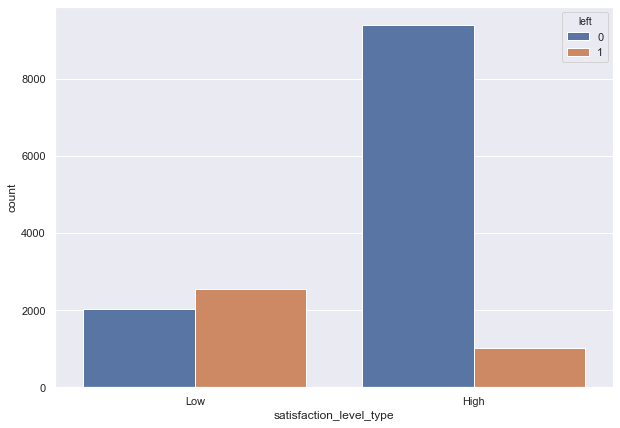

In [26]:
#Making a count plot for satisfaction_level_type to check which type has more turn over using hue='left'
plt.figure(figsize=(10,7))
sns.countplot(x='satisfaction_level_type', data=df, hue='left');

Previously we saw that employees having high number of projects are leaving. We also saw that some employees with extremely less number of projects are also leaving the company. Let us see how number of projects and satisfaction level are related.<br>
We can see this by checking the satisfaction level type and number of projects in according to that specific type. 

In [27]:
#Using groupby function to determine the relationship between number of projects and satisfaction level type
grp6=df.groupby('number_project')['satisfaction_level_type'].value_counts().reset_index(name='Number of employees')
grp6

,number_project,satisfaction_level_type,Number of employees
0,2,Low,1797
1,2,High,591
2,3,High,3504
3,3,Low,551
4,4,High,3807
5,4,Low,558
6,5,High,2281
7,5,Low,480
8,6,Low,946
9,6,High,228


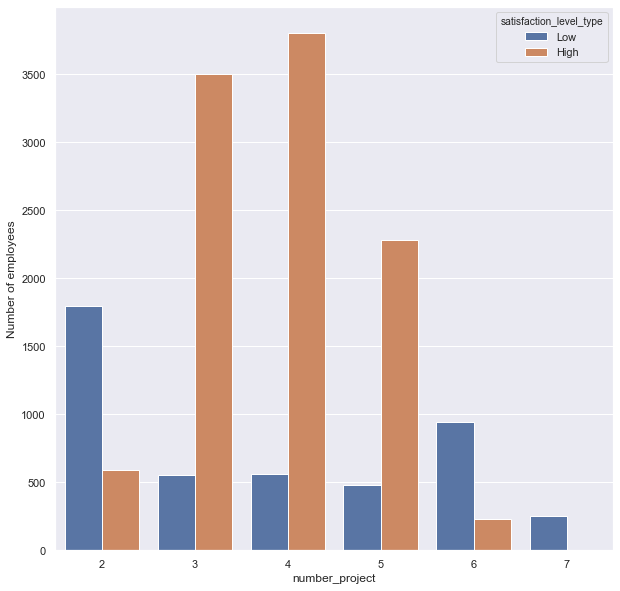

In [28]:
#Making a plot of the results
plt.figure(figsize=(10,10))
sns.barplot(x='number_project', y='Number of employees', data=grp6, hue='satisfaction_level_type');

**Note:** A higher number of employees who are working on **3-5 projects have higher satisfaction levels**, while more employees working on **2,6 or 7 projects have lower satisfaction level**.

Now lets check number of projects for low satisfaction level

    number_project satisfaction_level_type  Number of employees
0                2                     Low                 1797
3                3                     Low                  551
5                4                     Low                  558
7                5                     Low                  480
8                6                     Low                  946
10               7                     Low                  251


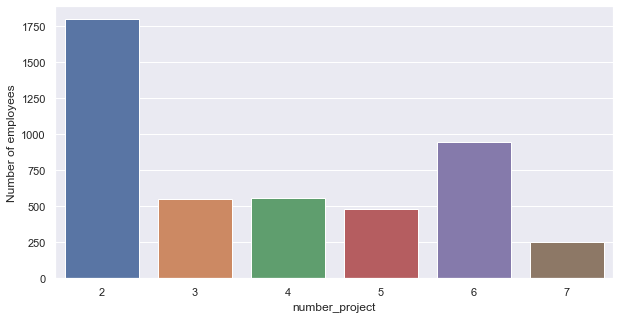

In [29]:
#Checking number of projects and generating plot for low satisfaction level type employees only
grpsatlow=grp6[grp6['satisfaction_level_type'] == 'Low']
print(grpsatlow)
plt.figure(figsize=(10,5))
sns.barplot(x='number_project', y='Number of employees', data=grpsatlow);

Notice that the people associated with low satisfaction level type, have either too few projects, i.e. number of projects = 2 or high number of projects i.e. 6 or even 7.

**Using these insights we can generate a new column 'employee_type' and assign categories as following:**<br>
- **If number of projects is equal to 2 then employee_type='unburdened'**
- **If number of projects is between 3 and 5 then employee_type = 'Satisfactory'**
- **If number of projects is 6 and above then employee_type='Burdened'**

In [30]:
df['employee_type']=''

In [31]:
df.loc[(df['number_project'] == 2), 'employee_type']='Unburdened'
df.loc[(df['number_project'] > 2) & (df['number_project'] <= 5), 'employee_type']='Satisfactory'
df.loc[(df['number_project'] > 5), 'employee_type']='Burdened'
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary,satisfaction_level_type,employee_type
0,0.38,0.53,2,157,3,0,1,0,sales,low,Low,Unburdened
1,0.80,0.86,5,262,6,0,1,0,sales,medium,High,Satisfactory
2,0.11,0.88,7,272,4,0,1,0,sales,medium,Low,Burdened
3,0.72,0.87,5,223,5,0,1,0,sales,low,High,Satisfactory
4,0.37,0.52,2,159,3,0,1,0,sales,low,Low,Unburdened


employee_type  left
Burdened       1         911
               0         519
Satisfactory   0       10088
               1        1093
Unburdened     1        1567
               0         821
Name: left, dtype: int64


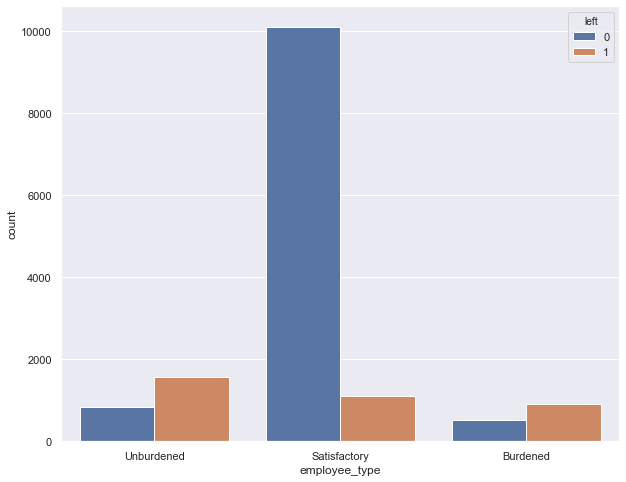

In [32]:
#Making a countplot to see which type of employee is leaving
grp7=df.groupby('employee_type')['left'].value_counts()
print(grp7)
plt.figure(figsize=(10,8))
sns.countplot(x='employee_type', data=df, hue='left');

### Remove Redundant Features

In [33]:
#We shall remove the columns used in feature engineering i.e. 'satisfaction_level' and 'number_project'
df.drop(['satisfaction_level', 'number_project'], axis=1, inplace=True)
df.head()

,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary,satisfaction_level_type,employee_type
0,0.53,157,3,0,1,0,sales,low,Low,Unburdened
1,0.86,262,6,0,1,0,sales,medium,High,Satisfactory
2,0.88,272,4,0,1,0,sales,medium,Low,Burdened
3,0.87,223,5,0,1,0,sales,low,High,Satisfactory
4,0.52,159,3,0,1,0,sales,low,Low,Unburdened


# Machine Learning

Before moving further, we need to apply one-hot encoding on categorical variables i.e. **dept, salary, satisfaction_level_type,** and **employee_type**

In [34]:
#One-Hot encoding
df_OneHot = pd.get_dummies(df, columns=['dept', 'salary', 'satisfaction_level_type', 'employee_type'])
df_OneHot.head()

,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept_IT,dept_RandD,dept_accounting,dept_hr,...,dept_support,dept_technical,salary_high,salary_low,salary_medium,satisfaction_level_type_High,satisfaction_level_type_Low,employee_type_Burdened,employee_type_Satisfactory,employee_type_Unburdened
0,0.53,157,3,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1,0.86,262,6,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
2,0.88,272,4,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
3,0.87,223,5,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4,0.52,159,3,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [35]:
#Copying data into df
df = df_OneHot.copy()
df.head()

,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept_IT,dept_RandD,dept_accounting,dept_hr,...,dept_support,dept_technical,salary_high,salary_low,salary_medium,satisfaction_level_type_High,satisfaction_level_type_Low,employee_type_Burdened,employee_type_Satisfactory,employee_type_Unburdened
0,0.53,157,3,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1,0.86,262,6,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
2,0.88,272,4,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
3,0.87,223,5,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4,0.52,159,3,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [36]:
#Creating Independent and Dependent Variables
X = df.drop('left', axis=1)
Y = df['left']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
#Perform Train Test Split with test size 30 percent and random state = 100
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.3, random_state=100, shuffle=True)

In [39]:
#Getting shape of training and testing data
print(xtrain.shape, ytrain.shape)
print(xtest.shape,ytest.shape)

(10499, 23) (10499,)
(4500, 23) (4500,)


**We shall get predictions using the following models.**<br>
- Random Forest
- Logistic Regression
- Ada Boost
- XG Boost

<br> 

**Also get the following scores for each of the above models**
- Accuracy
- Precision
- Recall
- F1-Score
- Classification Report

## Random Forest

In [40]:
#Importing the model from sklearn
from sklearn.ensemble import RandomForestClassifier

In [41]:
#Making instance and training the model
clf_rf = RandomForestClassifier(random_state=100)
clf_rf.fit(xtrain, ytrain)

RandomForestClassifier(random_state=100)

In [42]:
#Get predictions
rf_pred = clf_rf.predict(xtest)

**Precision**

In [43]:
from sklearn.metrics import precision_score

In [44]:
rf_precision = precision_score(ytest, rf_pred)
print("Precision: {}".format(rf_precision))

Precision: 0.9733700642791552


**Accuracy**

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
rf_accuracy = accuracy_score(ytest, rf_pred)
print("Accuracy: {}".format(rf_accuracy))

Accuracy: 0.9848888888888889


**Recall**

In [47]:
from sklearn.metrics import recall_score

In [48]:
rf_recall = recall_score(ytest, rf_pred)
print("Recall: {}".format(rf_recall))

Recall: 0.9645131938125568


**F1-Score**

In [49]:
from sklearn.metrics import f1_score

In [50]:
rf_f1_score = f1_score(ytest, rf_pred)
print("F1 Score: {}".format(rf_f1_score))

F1 Score: 0.9689213893967092


**Classification Report**

In [51]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(ytest,rf_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3401
           1       0.97      0.96      0.97      1099

    accuracy                           0.98      4500
   macro avg       0.98      0.98      0.98      4500
weighted avg       0.98      0.98      0.98      4500



## Logistic Regression

In [53]:
#Import the model
from sklearn.linear_model import LogisticRegression

In [54]:
#Create instance and train, random _state=100
lr_model = LogisticRegression(random_state=100)
lr_model.fit(xtrain, ytrain)

C:\Users\Fahad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=100)

In [55]:
#Get predictions
lr_pred = lr_model.predict(xtest)
lr_pred[0:9]

array([0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

**Accuracy**

In [56]:
lr_accuracy = accuracy_score(ytest,lr_pred)
print("Accuracy by built-in function: {}".format(lr_accuracy))

Accuracy by built-in function: 0.8608888888888889


**Precision**

In [57]:
lr_precision = precision_score(ytest,lr_pred)
print("Precision by built-in function: {}".format(lr_precision))

Precision by built-in function: 0.7307317073170732


**Recall**

In [58]:
lr_recall = recall_score(ytest,lr_pred)
print("Recall by built-in function: {}".format(lr_recall))

Recall by built-in function: 0.6815286624203821


**F1 Score**

In [59]:
lr_f1_score = f1_score(ytest,lr_pred)
print("F1 Score by built-in function: {}".format(lr_f1_score))

F1 Score by built-in function: 0.7052730696798494


**Classification Report**

In [60]:
print(classification_report(ytest,lr_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      3401
           1       0.73      0.68      0.71      1099

    accuracy                           0.86      4500
   macro avg       0.82      0.80      0.81      4500
weighted avg       0.86      0.86      0.86      4500



## Ada Boost

In [61]:
#Importing the model
from sklearn.ensemble import AdaBoostClassifier

In [62]:
#Make an instance and train the model with random state =100
clf_adb = AdaBoostClassifier(random_state=100)
clf_adb.fit(xtrain, ytrain)

AdaBoostClassifier(random_state=100)

In [63]:
#Getting predictions
pred_clf_adb = clf_adb.predict(xtest)

**Accuracy**

In [64]:
ab_accuracy= accuracy_score(ytest, pred_clf_adb)
print("Accuracy: {}".format(ab_accuracy))

Accuracy: 0.928


**Precision**

In [65]:
ab_precision = precision_score(ytest, pred_clf_adb)
print("Precision: {}".format(ab_precision))

Precision: 0.8611369990680335


**Recall**

In [66]:
ab_recall = recall_score(ytest, pred_clf_adb)
print("Recall: {}".format(ab_recall))

Recall: 0.8407643312101911


**F1-Score**

In [67]:
ab_f1_score = f1_score(ytest, pred_clf_adb)
print("F1 score: {}".format(ab_f1_score))

F1 score: 0.850828729281768


**Classification Report**

In [68]:
print(classification_report(ytest, pred_clf_adb))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      3401
           1       0.86      0.84      0.85      1099

    accuracy                           0.93      4500
   macro avg       0.91      0.90      0.90      4500
weighted avg       0.93      0.93      0.93      4500



## XG Boost

In [69]:
#Import the model
import xgboost as xgb

In [70]:
#Make an instance and train the model with random state =100
clf_xgb = xgb.XGBClassifier(seed=25,nthread=1,random_state=100)
clf_xgb.fit(xtrain, ytrain)

C:\Users\Fahad\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:26:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=1, nthread=1, num_parallel_tree=1,
              random_state=100, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=25, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [71]:
#Getting predictions
pred_clf_xgb = clf_xgb.predict(xtest)

**Accuracy**

In [72]:
xgb_accuracy = accuracy_score(ytest, pred_clf_xgb)
print("Accuracy: {}".format(xgb_accuracy))

Accuracy: 0.9795555555555555


**Precision**

In [73]:
xgb_precision = precision_score(ytest, pred_clf_xgb)
print("Precision: {}".format(xgb_precision))

Precision: 0.9615032080659945


**Recall**

In [74]:
xgb_recall = recall_score(ytest, pred_clf_xgb)
print("Recall: {}".format(xgb_recall))

Recall: 0.9545040946314831


**F1-Score**

In [75]:
xgb_f1_score = f1_score(ytest, pred_clf_xgb)
print("F1 score: {}".format(xgb_f1_score))

F1 score: 0.9579908675799086


**Classification Report**

In [76]:
print(classification_report(ytest, pred_clf_xgb))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3401
           1       0.96      0.95      0.96      1099

    accuracy                           0.98      4500
   macro avg       0.97      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500



# Result Comparisons

**Now we shall do a comparison of the above used models as per the scores found. For this we will make a dataframe that shows the models and scores for each models.**

In [77]:
#Making a dictionary of the models and their respective scores
comparison_dict={"Algorithm":["Random Forest","Logistic Regression","XGBoost","Ada Boost"],
                 "Accuracy":[rf_accuracy,lr_accuracy,xgb_accuracy,ab_accuracy],
                 "Precision":[rf_precision,lr_precision,xgb_precision,ab_precision],
                 "Recall":[rf_recall,lr_recall,xgb_recall,ab_recall],
                 "F1 Score":[rf_f1_score,lr_f1_score,xgb_f1_score,ab_f1_score]
                }

In [78]:
#Converting the dictionary to dataframe
comparison = pd.DataFrame(comparison_dict)
comparison.head()

,Algorithm,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.984889,0.973370,0.964513,0.968921
1,Logistic Regression,0.860889,0.730732,0.681529,0.705273
2,XGBoost,0.979556,0.961503,0.954504,0.957991
3,Ada Boost,0.928000,0.861137,0.840764,0.850829


**Note: *Random Forest*** model is giving the best Accuracy, Percision, Recall and F1 scores out of all 4 models used. If tuning is applied on this model, even better results can be achieved.

# Hyperparameters tuning using GridSearchCV for RandomForest

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
param_grid1 = {"n_estimators": [9, 18, 27, 36, 45, 54, 63],
               "max_depth": [1, 5, 10, 15, 20, 25, 30],
               "min_samples_leaf": [1, 2, 4, 6, 8, 10]}

RF = RandomForestClassifier(random_state=100)

RF_cv1 = GridSearchCV(RF, param_grid1, cv=5, scoring='accuracy', n_jobs=4)

RF_cv1.fit(xtrain, ytrain)

RF_cv1.best_params_, RF_cv1.best_score_

({'max_depth': 30, 'min_samples_leaf': 1, 'n_estimators': 63},
 0.9825696590213028)

In [81]:
param_grid2 = {"n_estimators": [60, 61, 62, 63, 64, 65, 66],
               "max_depth": [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
               "min_samples_leaf": [1, 2, 3, 4, 5]}

RF = RandomForestClassifier(random_state=100)
RF_cv2 = GridSearchCV(RF, param_grid2, cv=5, scoring='accuracy', n_jobs=4)

RF_cv2.fit(xtrain, ytrain)

RF_cv2.best_params_, RF_cv2.best_score_

({'max_depth': 27, 'min_samples_leaf': 1, 'n_estimators': 64},
 0.9830458948705733)

In [82]:
param_grid3 = {"n_estimators": [61, 62, 63, 64, 65, 66, 67],
               "max_depth": [22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
               "min_samples_leaf": [1, 2, 3, 4]}

RF = RandomForestClassifier(random_state=100)
RF_cv3 = GridSearchCV(RF, param_grid3, cv=5, scoring='accuracy', n_jobs=4)

RF_cv3.fit(xtrain, ytrain)

RF_cv3.best_params_, RF_cv3.best_score_

({'max_depth': 27, 'min_samples_leaf': 1, 'n_estimators': 64},
 0.9830458948705733)

# Tuned RandomForest GridSearchCV

In [83]:
RF_grid = RF_cv3.best_estimator_

In [84]:
RF_grid.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=27, n_estimators=64, random_state=100)

In [85]:
rf_pred_t = RF_grid.predict(xtest)

# Precision of tuned RandomForest through GridSearchCV

In [86]:
precision_rf_t = precision_score(ytest, rf_pred_t)
print("Precision after tuning: {}".format(precision_rf_t))

Precision after tuning: 0.9750692520775623


# Accuracy of tuned RandomForest through GridSearchCV

In [87]:
accuracy_rf_t = accuracy_score(ytest, rf_pred_t)
print("Accuracy after tuning: {}".format(accuracy_rf_t))

Accuracy after tuning: 0.9844444444444445


# Recall  of tuned RandomForest through GridSearchCV

In [88]:
recall_rf_t = recall_score(ytest, rf_pred_t)
print("Recall after tuning: {}".format(recall_rf_t))

Recall after tuning: 0.9608735213830755


# F1 score  of tuned RandomForest through GridSearchCV

In [89]:
rf_t_f1 = f1_score(ytest, rf_pred_t)
print("F1 score after tuning: {}".format(rf_t_f1))

F1 score after tuning: 0.9679193400549955


# Classification report

In [90]:
print(classification_report(ytest,rf_pred_t))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3401
           1       0.98      0.96      0.97      1099

    accuracy                           0.98      4500
   macro avg       0.98      0.98      0.98      4500
weighted avg       0.98      0.98      0.98      4500



# Hyperparameters tuning using Randomized Search for RandomForest

In [91]:
from sklearn.model_selection import RandomizedSearchCV

In [92]:
rf_rs = RandomForestClassifier(random_state=100)

In [93]:
for x in np.linspace(start=10, stop=1000, num=10):
    print(x)

10.0
120.0
230.0
340.0
450.0
560.0
670.0
780.0
890.0
1000.0


In [94]:
n_estimators = [int(x) for x in np.linspace(start=10, stop=1000, num=10)]
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]

In [95]:
random_grid1 = {"n_estimators": n_estimators,
                "max_depth": max_depth,
                "min_samples_split": min_samples_split}

In [96]:
rf_random = RandomizedSearchCV(
    estimator=rf_rs, param_distributions=random_grid1, n_iter=50, cv=5, verbose=2, random_state=100)
rf_random.fit(xtrain, ytrain)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=80, min_samples_split=10, n_estimators=450; total time=   3.8s
[CV] END max_depth=80, min_samples_split=10, n_estimators=450; total time=   5.3s
[CV] END max_depth=80, min_samples_split=10, n_estimators=450; total time=   5.0s
[CV] END max_depth=80, min_samples_split=10, n_estimators=450; total time=   4.8s
[CV] END max_depth=80, min_samples_split=10, n_estimators=450; total time=   4.7s
[CV] END max_depth=30, min_samples_split=5, n_estimators=560; total time=   6.0s
[CV] END max_depth=30, min_samples_split=5, n_estimators=560; total time=   6.3s
[CV] END max_depth=30, min_samples_split=5, n_estimators=560; total time=   6.2s
[CV] END max_depth=30, min_samples_split=5, n_estimators=560; total time=   5.7s
[CV] END max_depth=30, min_samples_split=5, n_estimators=560; total time=   6.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=1000; total time=  11.9s
[CV] END max_depth=None, min_samples_sp

[CV] END max_depth=20, min_samples_split=10, n_estimators=670; total time=   6.1s
[CV] END max_depth=20, min_samples_split=10, n_estimators=670; total time=   5.1s
[CV] END max_depth=20, min_samples_split=10, n_estimators=670; total time=   5.1s
[CV] END max_depth=20, min_samples_split=10, n_estimators=670; total time=   5.2s
[CV] END max_depth=20, min_samples_split=10, n_estimators=670; total time=   5.5s
[CV] END max_depth=60, min_samples_split=5, n_estimators=340; total time=   2.5s
[CV] END max_depth=60, min_samples_split=5, n_estimators=340; total time=   2.8s
[CV] END max_depth=60, min_samples_split=5, n_estimators=340; total time=   2.8s
[CV] END max_depth=60, min_samples_split=5, n_estimators=340; total time=   2.9s
[CV] END max_depth=60, min_samples_split=5, n_estimators=340; total time=   3.3s
[CV] END max_depth=60, min_samples_split=5, n_estimators=120; total time=   1.1s
[CV] END max_depth=60, min_samples_split=5, n_estimators=120; total time=   1.1s
[CV] END max_depth=60, 

[CV] END max_depth=30, min_samples_split=2, n_estimators=450; total time=   2.8s
[CV] END max_depth=30, min_samples_split=2, n_estimators=450; total time=   2.8s
[CV] END max_depth=30, min_samples_split=2, n_estimators=450; total time=   2.8s
[CV] END max_depth=30, min_samples_split=2, n_estimators=450; total time=   3.0s
[CV] END max_depth=None, min_samples_split=5, n_estimators=560; total time=   4.1s
[CV] END max_depth=None, min_samples_split=5, n_estimators=560; total time=   3.9s
[CV] END max_depth=None, min_samples_split=5, n_estimators=560; total time=   3.6s
[CV] END max_depth=None, min_samples_split=5, n_estimators=560; total time=   3.9s
[CV] END max_depth=None, min_samples_split=5, n_estimators=560; total time=   3.7s
[CV] END max_depth=80, min_samples_split=5, n_estimators=1000; total time=   7.1s
[CV] END max_depth=80, min_samples_split=5, n_estimators=1000; total time=   6.7s
[CV] END max_depth=80, min_samples_split=5, n_estimators=1000; total time=   6.2s
[CV] END max_de

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
                   n_iter=50,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 120, 230, 340, 450,
                                                         560, 670, 780, 890,
                                                         1000]},
                   random_state=100, verbose=2)

In [97]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=40, n_estimators=670, random_state=100)

In [98]:
clf_rf_rand = rf_random.best_estimator_

In [99]:
clf_rf_rand.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=40, n_estimators=670, random_state=100)

In [100]:
pred_rf_rand = clf_rf_rand.predict(xtest)

# Precision  of Tuned Random Forest through Randomized Search

In [101]:
precision_rf_r = precision_score(ytest,pred_rf_rand)
print("Precision after tuning: {}".format(precision_rf_r))

Precision after tuning: 0.9751381215469613


# Accuracy  of Tuned Random Forest through Randomized Search

In [102]:
accuracy_rf_r = accuracy_score(ytest,pred_rf_rand)
print("Accuracy after tuning: {}".format(accuracy_rf_r))

Accuracy after tuning: 0.9851111111111112


# Recall  of Tuned Random Forest through Randomized Search

In [103]:
recall_rf_r = recall_score(ytest,pred_rf_rand)
print("Recall after tuning: {}".format(recall_rf_r))

Recall after tuning: 0.9636032757051866


# F1 score  of Tuned Random Forest through Randomized Search

In [104]:
f1_rf_r = f1_score(ytest,pred_rf_rand)
print("F1 score after tuning: {}".format(f1_rf_r))

F1 score after tuning: 0.9693363844393592


# Classification report

In [105]:
print(classification_report(ytest,pred_rf_rand))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3401
           1       0.98      0.96      0.97      1099

    accuracy                           0.99      4500
   macro avg       0.98      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



# Comparison again

In [106]:
comparison_dict2={"Algorithm":["Logistic Regression","Random Forest","Tuned Random Forest(Grid)","Tuned Random Forest(Random)","XGBoost","Ada Boost"],
                 "Accuracy":[lr_accuracy,rf_accuracy,accuracy_rf_t,accuracy_rf_r,xgb_accuracy,ab_accuracy],
                 "Precision":[lr_precision,rf_precision,precision_rf_t,precision_rf_r,xgb_precision,ab_precision],
                 "Recall":[lr_recall,rf_recall,recall_rf_t,recall_rf_r,xgb_recall,ab_recall],
                 "F1 Score":[lr_f1_score,rf_f1_score,rf_t_f1,f1_rf_r,xgb_f1_score,ab_f1_score]
                }

In [107]:
comparison2 = pd.DataFrame(comparison_dict2)
comparison2

,Algorithm,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.860889,0.730732,0.681529,0.705273
1,Random Forest,0.984889,0.973370,0.964513,0.968921
2,Tuned Random Forest(Grid),0.984444,0.975069,0.960874,0.967919
3,Tuned Random Forest(Random),0.985111,0.975138,0.963603,0.969336
4,XGBoost,0.979556,0.961503,0.954504,0.957991
5,Ada Boost,0.928000,0.861137,0.840764,0.850829


**Note: *Tuned RandomForest Random search*** is the best model out of the 6 models used. It gives best Accuracy, Precision and F1 score. The Recall is slightly lower than the Random Forest model but overall it outperforms all the other models.